In [ ]:
import pandas as pd
import numpy as np
import random
import altair as alt
alt.renderers.enable('notebook')
import matplotlib.pyplot as plt

from scipy import optimize
from scipy.stats import expon

import math

import time
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import esb
import td

import seaborn as sns

### Parâmetros da função market

- jogadores: quantidade de jogadores, distribuidos igualmente entre vendedores e compradores
- co: quantidade de preços limites que cada agente tem disponível
- per: quantidade de subperíodos
- paper_values: utiliza os preços limites do artigo $\textit{Price Formation in Double Auctions}$. Neste caso, jogadores= 8 e co=3.
- memo: memória de cada agente dos últimos $n$ negócios realizados.
- FP_DP_TD: algoritmo será utilizado no comportamento dos agentes.
    - = 0: Fictitious Play
    - = 1: Programação Dinâmica
    - = 3: Q-Learning

- inf: menor valor dos preços limites. 
- sup: maior valor dos preços limites.
- acoes: quantidade de ações permitidas no intervalo \[inf,sup\]

In [2]:
mercado=esb.market(jogadores=20,co=5,per=10,paper_values=False,memo=20,FP_DP_TD=0,inf=0,sup=100,acoes=100)

Valores Limites

vazio   0 : [1, 20, 37, 80, 83]
vendedor   1 : [8, 51, 53, 90, 99]
vendedor   2 : [13, 31, 63, 78, 82]
vendedor   3 : [20, 40, 42, 45, 94]
vendedor   4 : [3, 38, 56, 58, 80]
vendedor   5 : [39, 41, 50, 62, 93]
vendedor   6 : [20, 49, 56, 56, 65]
vendedor   7 : [20, 64, 71, 88, 95]
vendedor   8 : [6, 19, 39, 77, 100]
vendedor   9 : [4, 23, 61, 82, 100]
vendedor   10 : [3, 24, 27, 42, 88]
comprador   11 : [61, 44, 28, 21, 4]
comprador   12 : [82, 49, 37, 16, 16]
comprador   13 : [99, 85, 55, 45, 17]
comprador   14 : [92, 75, 39, 39, 18]
comprador   15 : [92, 53, 15, 10, 0]
comprador   16 : [70, 50, 37, 28, 17]
comprador   17 : [89, 79, 20, 19, 10]
comprador   18 : [52, 51, 48, 28, 13]
comprador   19 : [70, 64, 61, 42, 4]
comprador   20 : [82, 81, 81, 18, 16]


7.630670785903931


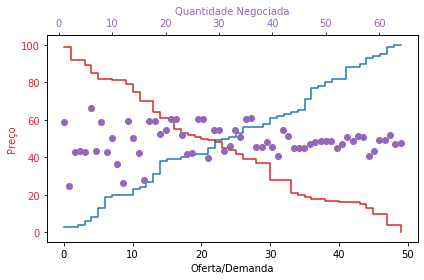

<Figure size 1440x1440 with 0 Axes>

In [3]:
esb.iteracoes(mercado,it=5)
esb.plot_sim(mercado)

In [10]:
mercado_DP=esb.market(jogadores=20,co=5,per=10,paper_values=False,memo=20,FP_DP_TD=1,inf=0,sup=100,acoes=100)

Valores Limites

vazio   0 : [40, 47, 68, 71, 89]
vendedor   1 : [20, 58, 68, 90, 97]
vendedor   2 : [5, 19, 28, 41, 48]
vendedor   3 : [35, 51, 67, 68, 79]
vendedor   4 : [17, 28, 38, 75, 97]
vendedor   5 : [4, 23, 33, 60, 80]
vendedor   6 : [10, 16, 50, 61, 69]
vendedor   7 : [1, 3, 20, 52, 63]
vendedor   8 : [2, 23, 27, 77, 90]
vendedor   9 : [73, 81, 85, 96, 100]
vendedor   10 : [14, 29, 32, 60, 84]
comprador   11 : [31, 28, 18, 10, 1]
comprador   12 : [72, 34, 23, 16, 10]
comprador   13 : [93, 87, 87, 82, 45]
comprador   14 : [72, 53, 32, 31, 11]
comprador   15 : [87, 70, 25, 4, 3]
comprador   16 : [93, 64, 55, 19, 15]
comprador   17 : [61, 49, 22, 8, 6]
comprador   18 : [94, 76, 74, 47, 31]
comprador   19 : [72, 48, 44, 37, 6]
comprador   20 : [93, 67, 64, 47, 19]


123.91347050666809


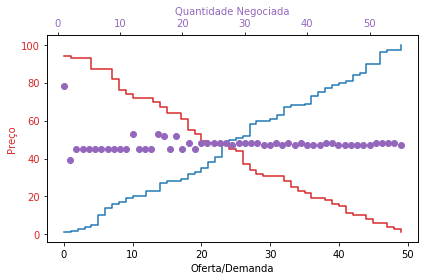

<Figure size 1440x1440 with 0 Axes>

In [11]:
esb.iteracoes(mercado_DP,it=5)
esb.plot_sim(mercado_DP)

In [8]:
mercado_TD=esb.market(jogadores=20,co=5,per=10,paper_values=False,memo=20,FP_DP_TD=3,inf=0,sup=100,acoes=100)

Valores Limites

vazio   0 : [8, 29, 64, 80, 86]
vendedor   1 : [8, 78, 79, 90, 92]
vendedor   2 : [20, 44, 51, 93, 96]
vendedor   3 : [49, 50, 67, 78, 78]
vendedor   4 : [6, 17, 30, 58, 79]
vendedor   5 : [14, 28, 62, 84, 90]
vendedor   6 : [29, 41, 68, 75, 85]
vendedor   7 : [16, 18, 29, 36, 62]
vendedor   8 : [5, 24, 26, 59, 82]
vendedor   9 : [23, 43, 55, 91, 99]
vendedor   10 : [23, 30, 54, 72, 82]
comprador   11 : [90, 89, 85, 48, 24]
comprador   12 : [88, 73, 43, 42, 28]
comprador   13 : [78, 65, 61, 59, 33]
comprador   14 : [87, 80, 77, 25, 22]
comprador   15 : [59, 32, 31, 28, 20]
comprador   16 : [70, 63, 43, 20, 12]
comprador   17 : [73, 64, 62, 24, 8]
comprador   18 : [86, 71, 69, 34, 26]
comprador   19 : [92, 88, 71, 37, 22]
comprador   20 : [95, 59, 42, 34, 18]


8.426462650299072


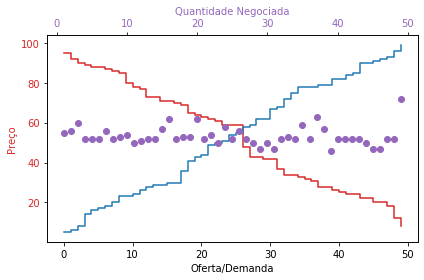

<Figure size 1440x1440 with 0 Axes>

In [9]:
esb.iteracoes(mercado_TD,it=25,pi=4)
esb.plot_sim(mercado_TD)

O gráfico abaixo é da função Q no estado (0,5) do comprador 13 (0 é o primeiro preço limite de 13 e 5 é a quantidade de subperíodos que faltam para terminar o período)

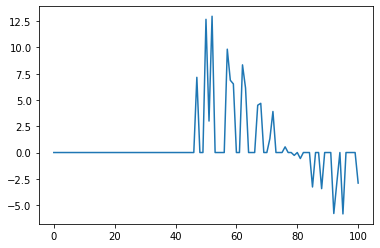

In [23]:
plt.plot(mercado_TD.Trader[13].Q[0,5])

O gráfico abaixo é da função Q no estado (0,10) do vendedor 9

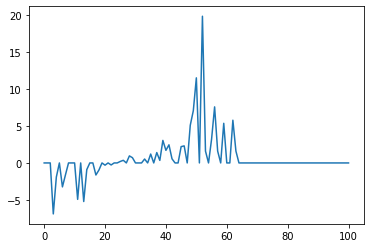

In [18]:
plt.plot(mercado_TD.Trader[9].Q[0,10])